In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("hotel_bookings 2.csv")

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df["lead_time"]

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(["company","agent"],axis =1
        ,inplace = True)

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df.describe()
df = df[df["adr"]<5000]

In [12]:
cancellation_count=df["is_canceled"].value_counts()
df["is_canceled"].replace(0,"Not_Cancelled",inplace = True)
df["is_canceled"].replace(1,"Cancelled",inplace = True)

Text(0.5, 1.0, 'Reservation status count')

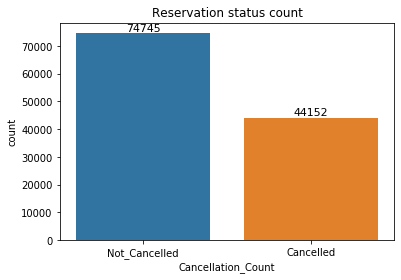

In [13]:
ax = sns.countplot(x = "is_canceled", data = df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
    textcoords='offset points')
plt.xlabel("Cancellation_Count")
plt.title("Reservation status count")
plt.show()


### From above graph we can say that 44152 people out of 118897  cancel there reservation .

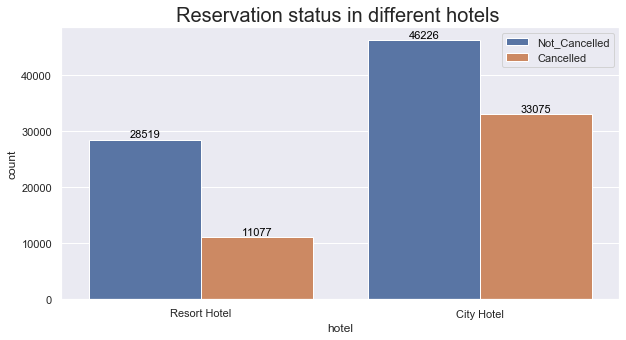

In [141]:
ax = sns.countplot(x = "hotel" , data = df ,hue = "is_canceled")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
    textcoords='offset points')
plt.title("Reservation status in different hotels ",size = 20)
plt.legend(title=False)
sns.set(rc={"figure.figsize":(10,5)})

### From above graph we can say that the maximum number of reservation occurs in city hotel and cacellation too.

In [92]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [16]:
resort_avg_day = df[df["hotel"] == "Resort Hotel"].groupby(["reservation_status_date"],as_index=False)["adr"].mean()
city_avg_day = df[df["hotel"] == "City Hotel"].groupby(["reservation_status_date"],as_index=False)["adr"].mean()
resort_avg_day
city_avg_day

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2015-01-01,62.063158
2,2015-01-05,58.900000
3,2015-01-06,69.216667
4,2015-01-07,82.877500
...,...,...
859,2017-12-04,128.755465
860,2017-12-05,124.544536
861,2017-12-06,132.725882
862,2017-12-07,130.473617


Text(0, 0.5, 'RATE')

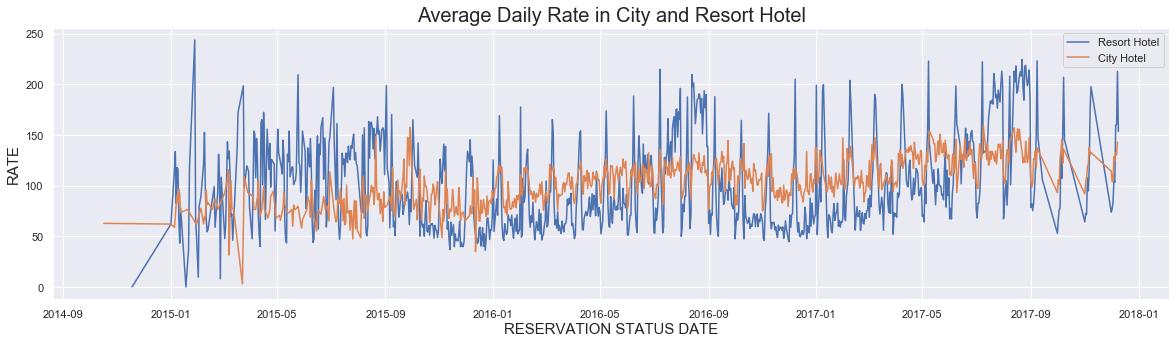

In [28]:
sns.lineplot(resort_avg_day["reservation_status_date"],resort_avg_day["adr"],label = "Resort Hotel")
sns.lineplot(city_avg_day["reservation_status_date"],city_avg_day["adr"],label = "City Hotel")
plt.title("Average Daily Rate in City and Resort Hotel", size = 20)
sns.set(rc={"figure.figsize":(20,5)})
plt.xlabel("RESERVATION STATUS DATE",size = 15)
plt.ylabel("RATE",size = 15)



### From abuograph we can say that the rate of resort hotel is quite high as compared to the city hotel.

In [50]:
monthly_cancellation = df.groupby(["arrival_date_month"] ,as_index =False)["is_canceled"].count()
monthly_cancellation

,arrival_date_month,is_canceled
0,April,11045
1,August,13852
2,December,6728
3,February,8012
4,January,5874
5,July,12628
6,June,10927
7,March,9738
8,May,11779
9,November,6752


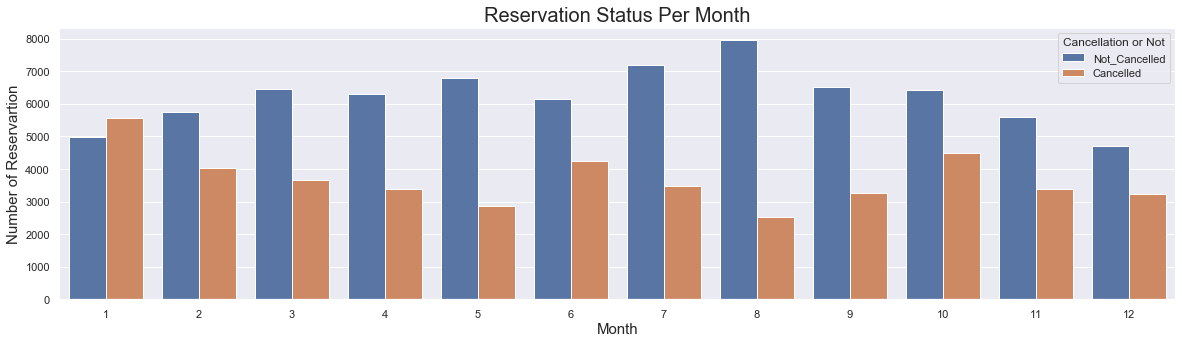

In [67]:
sns.countplot(x = df["reservation_status_date"].dt.month , data = df,hue = "is_canceled")
plt.title("Reservation Status Per Month" ,size =20)
plt.xlabel("Month",size = 15 )
plt.ylabel("Number of Reservartion",size = 15)
plt.legend(title = "Cancellation or Not")
plt.show()

### From above graph we can say that the maximum reservation cancellation seen in January while maximum reservation seen in August and at the same month the cancellation rate is low.

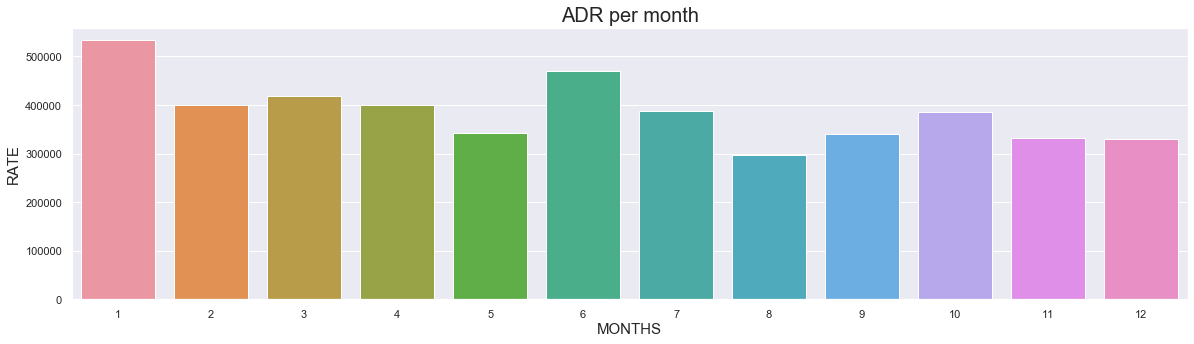

In [91]:
df["month"]=df["reservation_status_date"].dt.month
ax = sns.barplot("month","adr",data = df[df["is_canceled"]=="Cancelled"].groupby("month",as_index = False)[["adr"]].sum())
plt.title("ADR per month",size =20)
plt.ylabel("RATE",size =15)
plt.xlabel("MONTHS",size = 15)
plt.show()

### From above graph we can say that the pricing at January month is high as compared to the August and other months.

In [105]:
country_cancellation = df[df["is_canceled"]=="Cancelled"].groupby("country",as_index = False)["is_canceled"].count().sort_values(by = "is_canceled" ,ascending = False).reset_index(drop =True)
country_cancellation = country_cancellation.head(5)

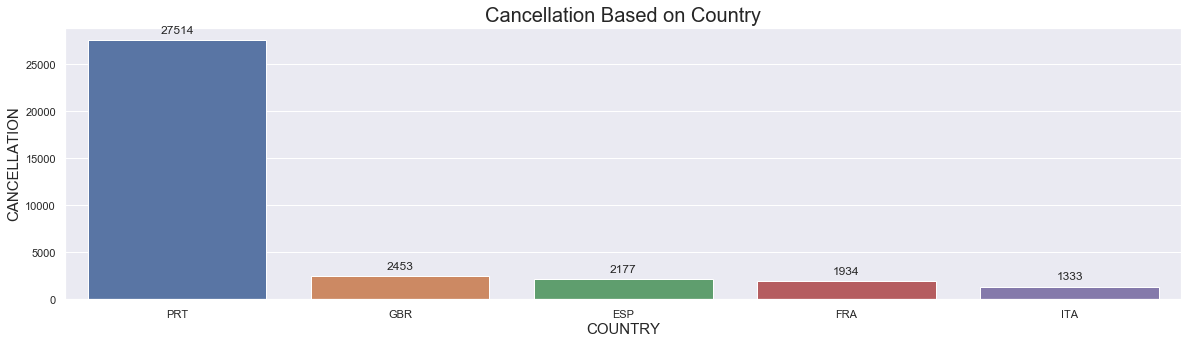

In [110]:
ax = sns.barplot(x="country",y="is_canceled",data=country_cancellation)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title("Cancellation Based on Country",size = 20)
plt.xlabel("COUNTRY",size =15)
plt.ylabel("CANCELLATION",size =15)
plt.show()

### From above graph it shows that the cancellation rate according to country is seen quite high in Portuguese which is upto.

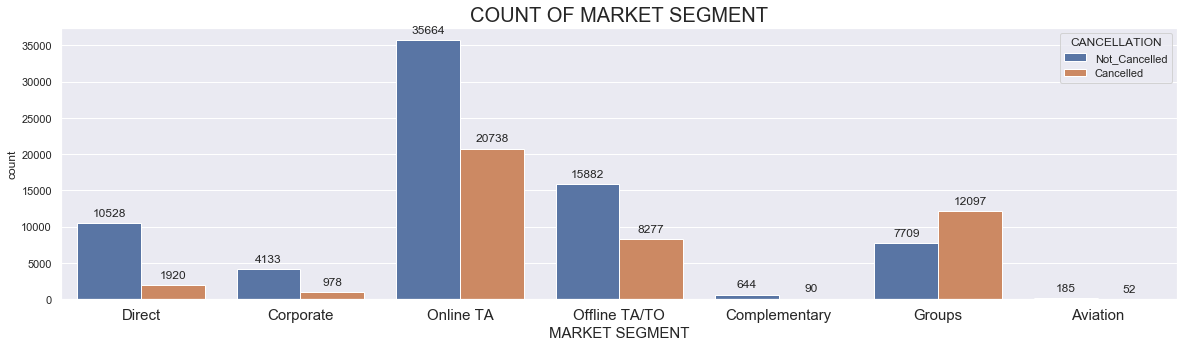

In [125]:
ax = sns.countplot(x='market_segment',data = df,hue ="is_canceled" )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.xlabel("MARKET SEGMENT", size =15)
plt.title("COUNT OF MARKET SEGMENT",size = 20)
plt.xticks(size = 15)
plt.legend(title = "CANCELLATION")
plt.show()

### From above graph we can say that the maximum reservation we are getting from online TA while the minimum reservation we are getting from aviation and complementary.

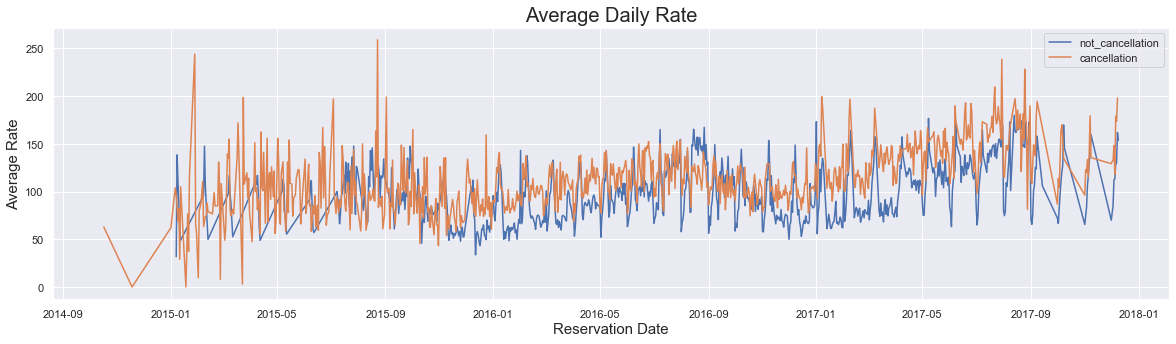

In [139]:
avg_not_cancellation_rate = df[df["is_canceled"] == "Not_Cancelled"].groupby("reservation_status_date",as_index = False)["adr"].mean()
avg_cancellation_rate = df[df["is_canceled"] == "Cancelled"].groupby("reservation_status_date",as_index = False)["adr"].mean()
sns.lineplot(avg_not_cancellation_rate["reservation_status_date"],avg_not_cancellation_rate["adr"],label = "not_cancellation")
sns.lineplot(avg_cancellation_rate["reservation_status_date"],avg_cancellation_rate["adr"],label ="cancellation")
plt.legend()
plt.title("Average Daily Rate",size = 20)
plt.xlabel("Reservation Date",size = 15)
plt.ylabel("Average Rate",size =15)
plt.show()

### From above graph we can say that the maximum cancellation occurring on daily basis due to variation in pricing or rate.

# CONCLUSION

##### 1. Cancelation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and                try to lower the the rates for specific hotels based on locations. They can also provide some discounts to the consumers.

##### 2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels                           should provide a reasonable discount on the room prices on weekends or on holidays.

##### 3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is               the highest in this months.

##### 4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.